In [1]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

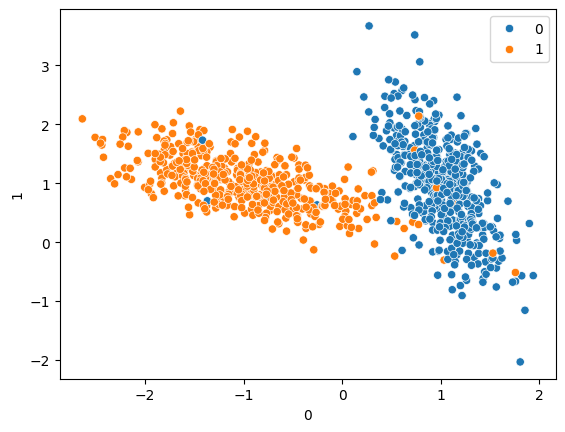

In [3]:
## create dataset

from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

##scatter plot
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [5]:
### train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.svm import SVC

model = SVC(kernel='linear')

model.fit(X_train,y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
print(report)
print(matrix)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.97      0.96      0.97       105

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

[[ 92   3]
 [  4 101]]


In [9]:
## hyper parameter tuning

params = {'C': [0.,1,10,100,1000],
          'gamma':[1,0.1,0.01,0.001,0.0001],
          'kernel':['linear','rbf']
          }

In [11]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid=params, cv=5,verbose=3,refit=True)

grid.fit(X_train, y_train)

grid.best_params_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .......C=0.0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END .......C=0.0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END .......C=0.0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END .......C=0.0, gamma=1, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ..........C=0.0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ..........C=0.0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ..........C=0.0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0.0, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.0, gamma=0.1, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.0, gamma=0.1, kernel=line

d:\KNMaterial\my_python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\KNMaterial\my_python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\KNMaterial\my_python\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "d:\KNMaterial\my_python\venv\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "d:\KNMaterial\my_python\ve

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [12]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [13]:
y_pred = grid.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test,y_pred)
matrix = confusion_matrix(y_test,y_pred)
print(report)
print(matrix)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.97      0.96      0.97       105

    accuracy                           0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

[[ 92   3]
 [  4 101]]
